In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

In [4]:
data = pd.read_csv('dataset_sdn.csv')

#### I .Data Analysis

In [5]:
data.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [6]:
data.shape

(104345, 23)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [8]:
##### Here we see that the label contains boolean values: 0 - Benign, 1-Maliciuous 
data.label.unique()

array([0, 1], dtype=int64)

In [9]:
data.label.value_counts()

0    63561
1    40784
Name: label, dtype: int64

C:\Users\CHARAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

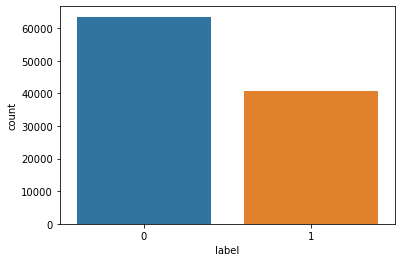

In [10]:
label_dict = dict(data.label.value_counts())
sns.countplot(data.label)

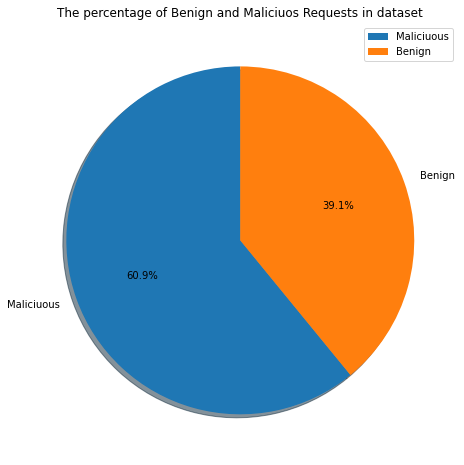

In [41]:
labels = ["Maliciuous",'Benign']
sizes = [dict(data.label.value_counts())[0], dict(data.label.value_counts())[1]]
plt.figure(figsize = (13,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
         shadow=True,startangle=90)
plt.legend(["Maliciuous", "Benign"])
plt.title('The percentage of Benign and Maliciuos Requests in dataset')
plt.show()

In [39]:
data.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


Text(0.5, 1.0, 'Features which has NuLL values')

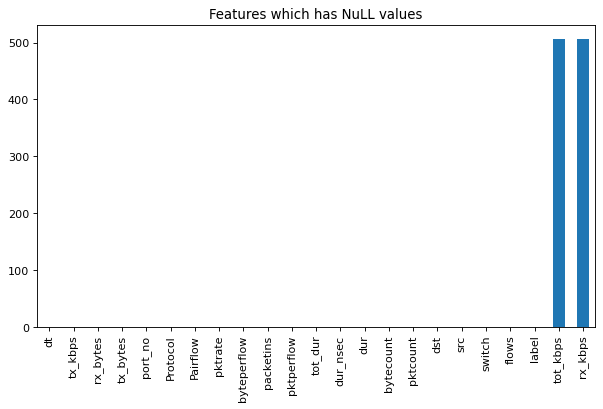

In [49]:
# Let's look at the vizualisation of Null valued features
figure(figsize=(9, 5), dpi=80)
data[data.columns[data.isna().sum() >= 0]].isna().sum().sort_values().plot.bar()
plt.title("Features which has NuLL values")

In [14]:
data.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [15]:
#### Let's support which columns NUMERIC and which is OBJECT

numeric_df = data.select_dtypes(include=['int64', 'float64'])
object_df = data.select_dtypes(include=['object'])
numeric_cols = numeric_df.columns
object_cols = object_df.columns
print('Numeric Columns: ')
print(numeric_cols, '\n')
print('Object Columns: ')
print(object_cols, '\n')
print('Number of Numeric Features: ', len(numeric_cols))
print('Number of Object Features: ', len(object_cols))

Numeric Columns: 
Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps', 'label'],
      dtype='object') 

Object Columns: 
Index(['src', 'dst', 'Protocol'], dtype='object') 

Number of Numeric Features:  20
Number of Object Features:  3


In [16]:
object_df.head()

,src,dst,Protocol
0,10.0.0.1,10.0.0.8,UDP
1,10.0.0.1,10.0.0.8,UDP
2,10.0.0.2,10.0.0.8,UDP
3,10.0.0.2,10.0.0.8,UDP
4,10.0.0.2,10.0.0.8,UDP


Text(0.5, 1.0, 'Number of all reqests')

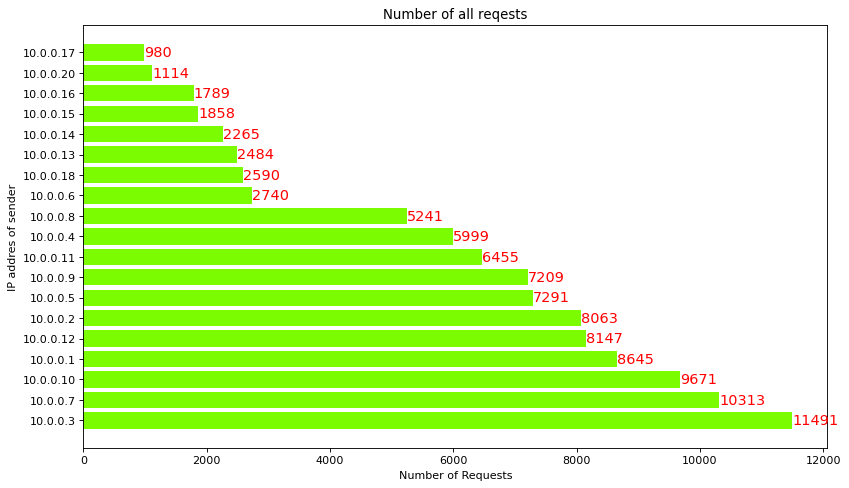

In [17]:
#### Let's look at Oblect columns (Source Destination Protocol)

figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data.src.value_counts()).keys()), dict(data.src.value_counts()).values(), color='lawngreen')

for idx, val in enumerate(dict(data.src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.title('Number of all reqests')

Text(0.5, 1.0, 'Number of Attack requests')

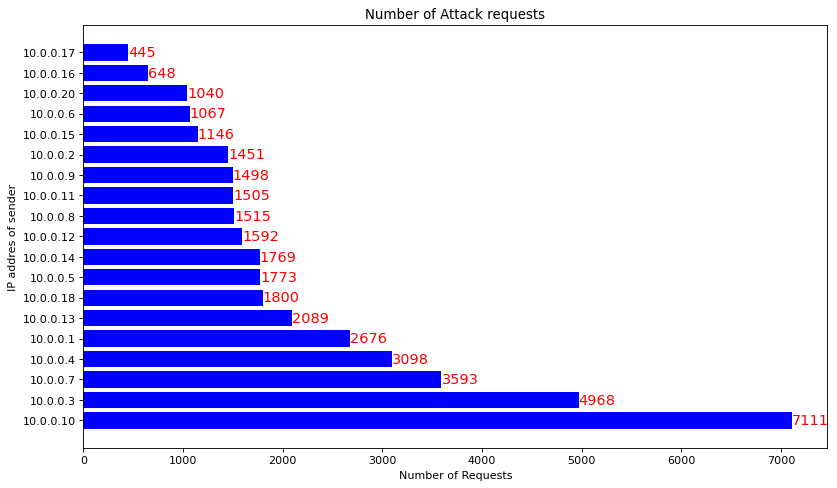

In [18]:
figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data[data.label == 1].src.value_counts()).keys()), dict(data[data.label == 1].src.value_counts()).values(), color='blue')

for idx, val in enumerate(dict(data[data.label == 1].src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.title('Number of Attack requests')

Text(0.5, 1.0, 'Number of requests from different IP adress')

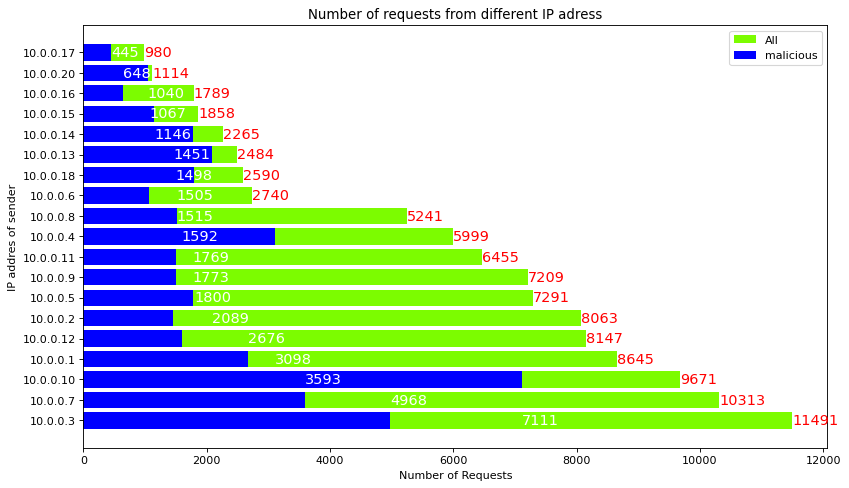

In [19]:
figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data.src.value_counts()).keys()), dict(data.src.value_counts()).values(), color='lawngreen')
plt.barh(list(dict(data[data.label == 1].src.value_counts()).keys()), dict(data[data.label == 1].src.value_counts()).values(), color='blue')

for idx, val in enumerate(dict(data.src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

for idx, val in enumerate(dict(data[data.label == 1].src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='w', size = 13)


plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.legend(['All','malicious'])
plt.title('Number of requests from different IP adress')

Text(0.5, 1.0, 'The number of requests from different protocols')

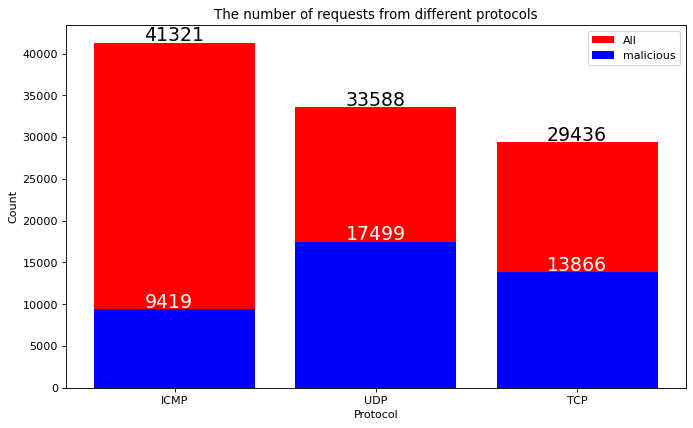

In [61]:
figure(figsize=(10, 6), dpi=80)
plt.bar(list(dict(data.Protocol.value_counts()).keys()), dict(data.Protocol.value_counts()).values(), color='r')
plt.bar(list(dict(data[data.label == 1].Protocol.value_counts()).keys()), dict(data[data.label == 1].Protocol.value_counts()).values(), color='b')

plt.text(x = 0 - 0.15, y = 41321 + 200, s = str(41321), color='black', size=17)
plt.text(x = 1 - 0.15, y = 33588 + 200, s = str(33588), color='black', size=17)
plt.text(x = 2 - 0.15, y = 29436 + 200, s = str(29436), color='black', size=17)

plt.text(x = 0 - 0.15, y = 9419 + 200, s = str(9419), color='w', size=17)
plt.text(x = 1 - 0.15, y = 17499 + 200, s = str(17499), color='w', size=17)
plt.text(x = 2 - 0.15, y = 13866 + 200, s = str(13866), color='w', size=17)

plt.xlabel('Protocol')
plt.ylabel('Count')
plt.legend(['All', 'malicious'])
plt.title('The number of requests from different protocols')

In [56]:
df = data.copy()

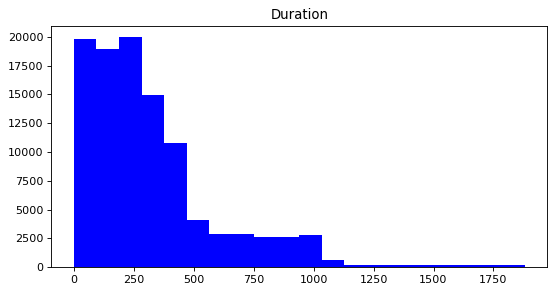

In [22]:
figure(figsize=(8, 4), dpi=80)
plt.hist(df.dur, bins=20, color='b')
plt.title('Duration')
plt.show()

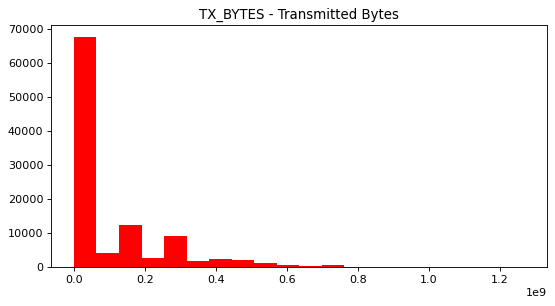

In [23]:
figure(figsize=(8, 4), dpi=80)
plt.hist(df.tx_bytes, bins=20, color='r')
plt.title('TX_BYTES - Transmitted Bytes')
plt.show()

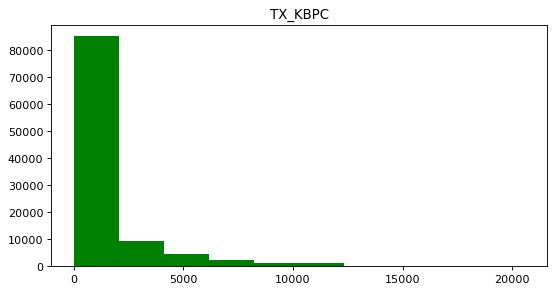

In [24]:
figure(figsize=(8, 4), dpi=80)
plt.hist(df.tx_kbps, bins=10, color='g')
plt.title('TX_KBPC')
plt.show()

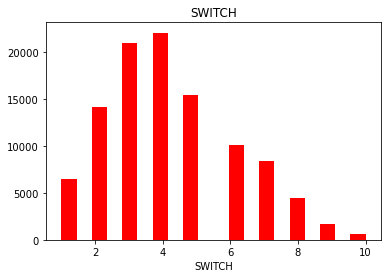

In [25]:
plt.hist(df.switch, bins=20, color='r')
plt.title('SWITCH')
plt.xlabel('SWITCH')
plt.show()

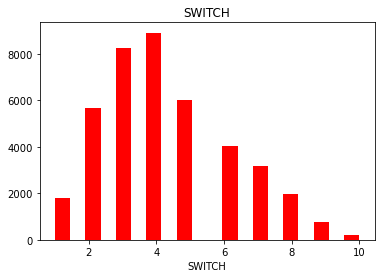

In [26]:
plt.hist(df[df['label'] == 1].switch, bins=20, color='r')
plt.title('SWITCH')
plt.xlabel('SWITCH')
plt.show()

#### II. Classical ML models

In [27]:

class Model:
    global y
    def __init__(self, data):
        self.data = data
        X = preprocessing.StandardScaler().fit(self.data).transform(self.data)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, random_state=42, test_size=0.3)  
    
    def LogisticRegression(self):
        solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

        start_time = time.time()
        results_lr = []
        accuracy_list = []
        for solver in solvers:
            LR = LogisticRegression(C=0.03, solver=solver).fit(self.X_train, self.y_train)
            predicted_lr = LR.predict(self.X_test)
            accuracy_lr = accuracy_score(self.y_test, predicted_lr)
            #print("Accuracy: %.2f%%" % (accuracy_lr * 100.0))
            #print('################################################################')
            results_lr.append({'solver' : solver, 'accuracy': str(round(accuracy_lr * 100, 2)) + "%", 
                                  'Coefficients': {'W' : LR.coef_, 'b': LR.intercept_}})
            
            accuracy_list.append(accuracy_lr)
       
        solver_name = solvers[accuracy_list.index(max(accuracy_list))]
        LR = LogisticRegression(C=0.03, solver=solver_name).fit(self.X_train,self.y_train)
        predicted_lr = LR.predict(self.X_test)
        accuracy_lr = accuracy_score(self.y_test, predicted_lr)
        print("Accuracy: %.2f%%" % (accuracy_lr * 100.0), '\n')
        print("########################################################################")
        print('Best solver is : ', solver_name)
        print("########################################################################")
        print(classification_report(predicted_lr, self.y_test), '\n')
        print("########################################################################")
        print("--- %s seconds --- time for LogisticRegression" % (time.time() - start_time))
        
        
   
    def DecisionTree(self):
        start_time = time.time()
        tree = DecisionTreeClassifier()
        dt_search = GridSearchCV(tree, param_grid={'criterion' : ['gini', 'entropy'],
                                           'max_depth' : [2,3,4,5,6,7,8, 9, 10],
                                           'max_leaf_nodes' : [2,3,4,5,6,7,8,9,10, 11]},
                           n_jobs=-1, cv=5, scoring='accuracy', verbose=2)
        
        dt_search.fit(self.X_train, self.y_train)
        
        criterion = dt_search.best_params_['criterion']
        max_depth = dt_search.best_params_['max_depth']
        max_leaf_nodes = dt_search.best_params_['max_leaf_nodes']
        
        dtree = DecisionTreeClassifier(criterion=criterion, 
                                       max_depth=max_depth, 
                                       max_leaf_nodes=max_leaf_nodes).fit(self.X_train, self.y_train)
        predicted_dt = dtree.predict(self.X_test)
        accuracy_dt = metrics.accuracy_score(self.y_test, predicted_dt)
        print(f"criterion: {criterion}, max depth: {max_depth}, max_leaf: {max_leaf_nodes}")
        print(f"The Accuracy is : {round(accuracy_dt * 100,2)}%")
        print("########################################################################")
        print(classification_report(predicted_dt, self.y_test))
        print("########################################################################")
        
        print("--- %s seconds ---" % (time.time() - start_time))
    
    def RandomForest(self):
        start_time = time.time()
        RF = RandomForestClassifier(criterion='gini', 
                                     n_estimators=500,
                                     min_samples_split=10,
                                     #min_samples_leaf=1,
                                     max_features='auto',
                                     oob_score=True,
                                     random_state=1,
                                     n_jobs=-1).fit(self.X_train, self.y_train)
        
        predicted_rf = RF.predict(self.X_test)
        svm_accuracy = accuracy_score(self.y_test, predicted_rf)
        print(f"Accuracy of RF is : {round(svm_accuracy*100,2)}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_rf, self.y_test))
        print("########################################################################")
        
        print("--- %s seconds ---" % (time.time() - start_time))

"""
Decision Tree works Well
Suppert Vector Machine works well
Logistic Regression works well
KNN works well
Random Forest works well
"""

'\nDecision Tree works Well\nSuppert Vector Machine works well\nLogistic Regression works well\nKNN works well\nRandom Forest works well\n'

In [28]:
df = data.copy()
df = df.dropna()

In [29]:
X = df.drop(['dt','src','dst','label'], axis=1)
y = df.label

In [31]:
X = pd.get_dummies(X)
X.head()

,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,...,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,Protocol_ICMP,Protocol_TCP,Protocol_UDP
0,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,...,0,3,143928631,3917,0,0.0,0.0,0,0,1
1,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,14424046,...,0,4,3842,3520,0,0.0,0.0,0,0,1
2,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,...,0,1,3795,1242,0,0.0,0.0,0,0,1
3,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,...,0,2,3688,1492,0,0.0,0.0,0,0,1
4,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,...,0,3,3413,3665,0,0.0,0.0,0,0,1


In [33]:
M = Model(X)
M


In [30]:

M.LogisticRegression()

Accuracy: 76.64% 

########################################################################
Best solver is :  liblinear
########################################################################
              precision    recall  f1-score   support

           0       0.84      0.79      0.81     20024
           1       0.66      0.72      0.69     11128

    accuracy                           0.77     31152
   macro avg       0.75      0.76      0.75     31152
weighted avg       0.77      0.77      0.77     31152
 

########################################################################
--- 4.371068954467773 seconds --- time for LogisticRegression


In [32]:

M.DecisionTree()

Fitting 5 folds for each of 180 candidates, totalling 900 fits
criterion: gini, max depth: 8, max_leaf: 11
The Accuracy is : 98.22%
########################################################################
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18743
           1       0.99      0.97      0.98     12409

    accuracy                           0.98     31152
   macro avg       0.98      0.98      0.98     31152
weighted avg       0.98      0.98      0.98     31152

########################################################################
--- 34.65223240852356 seconds ---


In [33]:

M.RandomForest()

Accuracy of RF is : 99.99% 

########################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18984
           1       1.00      1.00      1.00     12168

    accuracy                           1.00     31152
   macro avg       1.00      1.00      1.00     31152
weighted avg       1.00      1.00      1.00     31152

########################################################################
--- 8.409318208694458 seconds ---
